<h1>ECE521 Assignment 3</h1>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

<h2>Utils</h2>

In [104]:
def reduce_logsumexp(input_tensor, reduction_indices=1, keep_dims=False):
  """Computes the sum of elements across dimensions of a tensor in log domain.
     
     It uses a similar API to tf.reduce_sum.

  Args:
    input_tensor: The tensor to reduce. Should have numeric type.
    reduction_indices: The dimensions to reduce. 
    keep_dims: If true, retains reduced dimensions with length 1.
  Returns:
    The reduced tensor.
  """
  max_input_tensor1 = tf.reduce_max(input_tensor, 
                                    reduction_indices, keep_dims=keep_dims)
  max_input_tensor2 = max_input_tensor1
  if not keep_dims:
    max_input_tensor2 = tf.expand_dims(max_input_tensor2, 
                                       reduction_indices) 
  return tf.log(tf.reduce_sum(tf.exp(input_tensor - max_input_tensor2), 
                                reduction_indices, keep_dims=keep_dims)) + max_input_tensor1

def logsoftmax(input_tensor):
  """Computes normal softmax nonlinearity in log domain.

     It can be used to normalize log probability.
     The softmax is always computed along the second dimension of the input Tensor.     
 
  Args:
    input_tensor: Unnormalized log probability.
  Returns:
    normalized log probability.
  """
  return input_tensor - reduce_logsumexp(input_tensor, keep_dims=True)

<h2>1</h2>

<h3>1.1.2</h3>

In [87]:
data = np.load("../data/data2D.npy")
points_2d = data
x = points_2d[:,0]
y = points_2d[:,1]
print(x)
print(y)

[ 1.69424762  1.12750805  2.40075462 ..., -1.11873012  1.58777283
  1.36922966]
[-2.4385797  -2.06013747 -2.96636567 ..., -3.41074163  0.14010238
  0.26141621]


In [86]:
def buildGraph_K_means_Adam(K, learning_rate):
    # Variable creation
    points = tf.placeholder(tf.float32, [None, 2], name='input_points')
    centroids = tf.Variable(tf.truncated_normal(shape=[K,2], stddev=0.5), name='centroids')
    N = tf.shape(points)[0]
    # Replicate to N copies of each centroid and K copies of each
    # point, then subtract and compute the sum of squared distances.
    rep_centroids = tf.reshape(tf.tile(centroids, [N, 1]), [N, K, 2])
    rep_points = tf.reshape(tf.tile(points, [1, K]), [N, K, 2])
    sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids), reduction_indices=2)
    best_centroids = tf.argmin(sum_squares, 1)
    count = tf.to_float(tf.unsorted_segment_sum(tf.ones_like(points), best_centroids, K))
    percentage = tf.div(count, tf.to_float(N))
    # Loss definition
    indices_pair = tf.concat(1, [tf.reshape(tf.range(0, N), [-1,1]), tf.to_int32(tf.reshape(best_centroids, [-1,1]))])
    loss = tf.reduce_sum(tf.gather_nd(sum_squares, indices_pair))
    # Training mechanism
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)
    train = optimizer.minimize(loss=loss)
    return points, centroids, best_centroids, loss, percentage, train

In [6]:
a = tf.constant([[1,1],[0,0],[1,0]])
b = tf.constant([1,0,1])
indices_pair = tf.reshape(tf.range(0, 3), [-1,1])
concated = tf.concat(1, [indices_pair, tf.reshape(b, [-1,1])])
#concated = tf.reshape(concated, [-1,2])
sess = tf.InteractiveSession()
sess.run(concated)

array([[0, 1],
       [1, 0],
       [2, 1]], dtype=int32)

In [65]:
# fix figure size
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


Iteration#: 0, loss: 51582.71
Iteration#: 100, loss: 22138.27
Iteration#: 200, loss: 11517.29
Iteration#: 300, loss: 7299.35
Iteration#: 400, loss: 5568.12
Iteration#: 500, loss: 5138.67


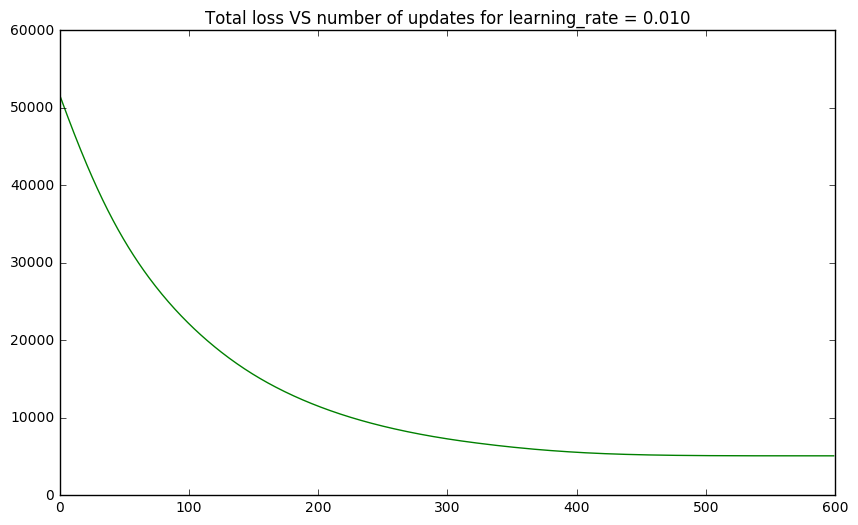

In [88]:
learning_rate = 0.01
points, centroids, centroids_assign, loss, percentage, train = buildGraph_K_means_Adam(3, learning_rate)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
loss_recorder = np.array([])

numIteration = 600
for itr in range(numIteration):
    loss_, _ = sess.run([loss, train], feed_dict={points: points_2d})
    loss_recorder = np.append(loss_recorder, loss_)
    if itr % 100 == 0:
        print("Iteration#: %d, loss: %0.2f"%(itr, loss_))
plt.plot(np.arange(numIteration), loss_recorder, 'g')
#plt.axis([0,500, 0, 2])
plt.title("Total loss VS number of updates for learning_rate = %0.3f"%(learning_rate))
plt.show()

<h3>1.1.3</h3>

Number of cluster: 1, loss: 51253.06
Number of cluster: 1, loss: 38833.33
Number of cluster: 1, loss: 38453.53
Number of cluster: 1, loss: 38453.49
Number of cluster: 1, loss: 38453.49
Number of cluster: 1, loss: 38453.49
Percentage for different clusters:
Total K is 1, cluster 0: 1.00


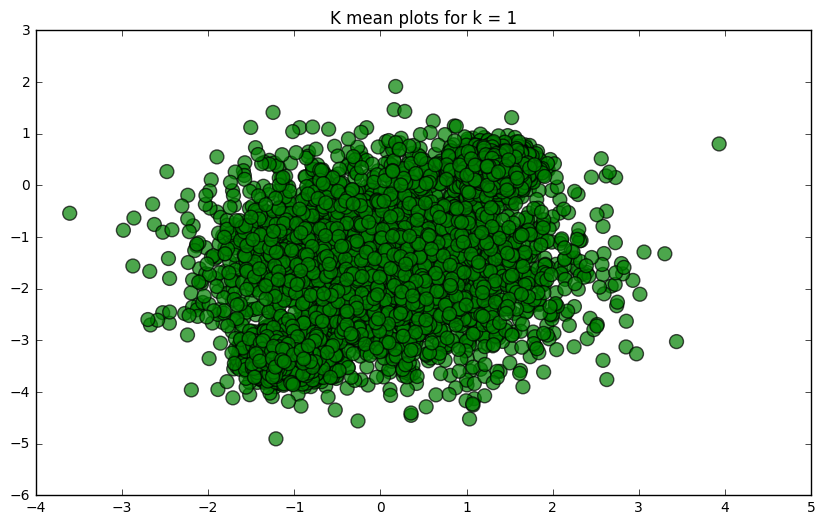

Number of cluster: 2, loss: 48749.64
Number of cluster: 2, loss: 21254.05
Number of cluster: 2, loss: 12675.85
Number of cluster: 2, loss: 9832.56
Number of cluster: 2, loss: 9248.00
Number of cluster: 2, loss: 9203.88
Percentage for different clusters:
Total K is 2, cluster 0: 0.50
Total K is 2, cluster 1: 0.50


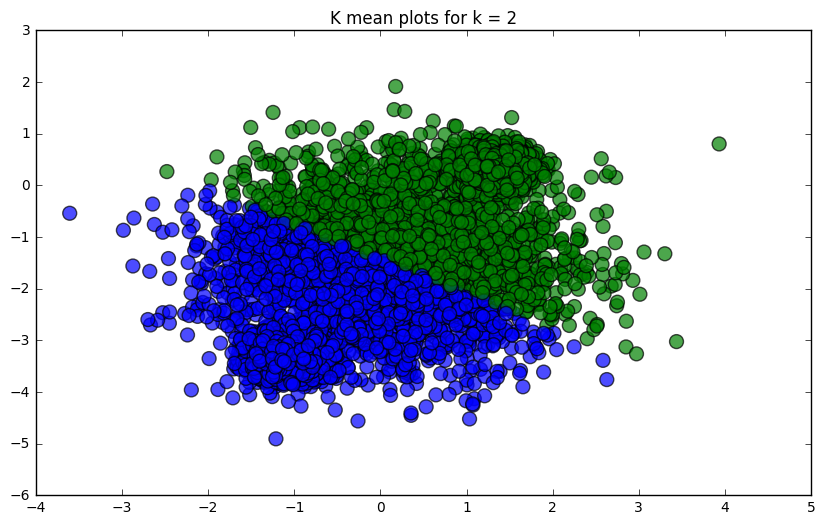

Number of cluster: 3, loss: 35115.51
Number of cluster: 3, loss: 13914.80
Number of cluster: 3, loss: 7855.31
Number of cluster: 3, loss: 5710.25
Number of cluster: 3, loss: 5148.38
Number of cluster: 3, loss: 5111.26
Percentage for different clusters:
Total K is 3, cluster 0: 0.38
Total K is 3, cluster 1: 0.24
Total K is 3, cluster 2: 0.38


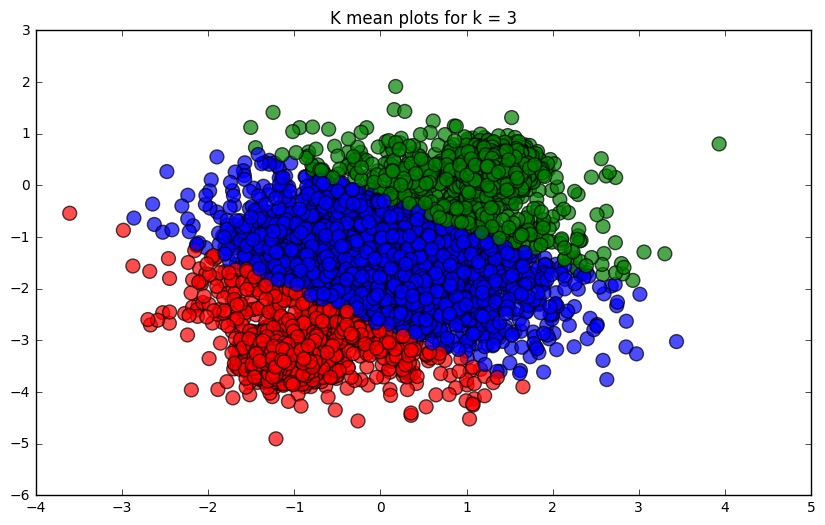

Number of cluster: 4, loss: 35247.98
Number of cluster: 4, loss: 12624.49
Number of cluster: 4, loss: 5663.77
Number of cluster: 4, loss: 3719.71
Number of cluster: 4, loss: 3390.58
Number of cluster: 4, loss: 3374.07
Percentage for different clusters:
Total K is 4, cluster 0: 0.37
Total K is 4, cluster 1: 0.12
Total K is 4, cluster 2: 0.13
Total K is 4, cluster 3: 0.37


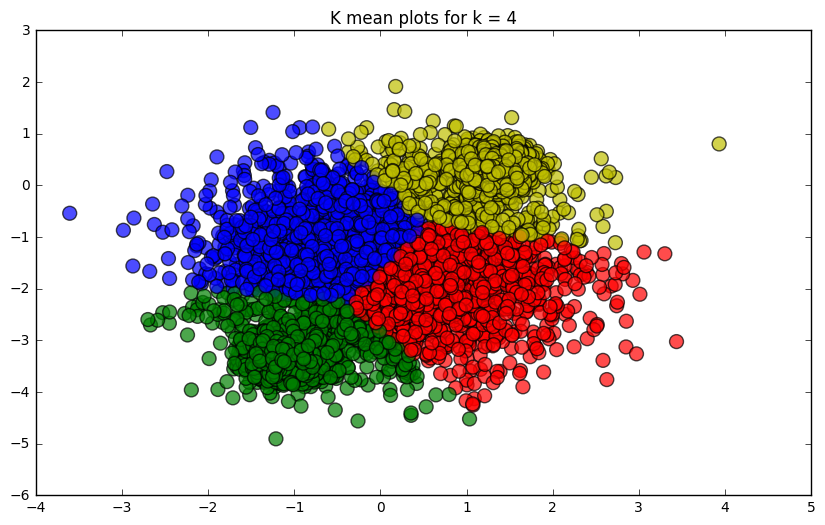

Number of cluster: 5, loss: 35489.74
Number of cluster: 5, loss: 13585.54
Number of cluster: 5, loss: 5776.71
Number of cluster: 5, loss: 3404.91
Number of cluster: 5, loss: 2907.85
Number of cluster: 5, loss: 2870.84
Percentage for different clusters:
Total K is 5, cluster 0: 0.11
Total K is 5, cluster 1: 0.08
Total K is 5, cluster 2: 0.07
Total K is 5, cluster 3: 0.37
Total K is 5, cluster 4: 0.37


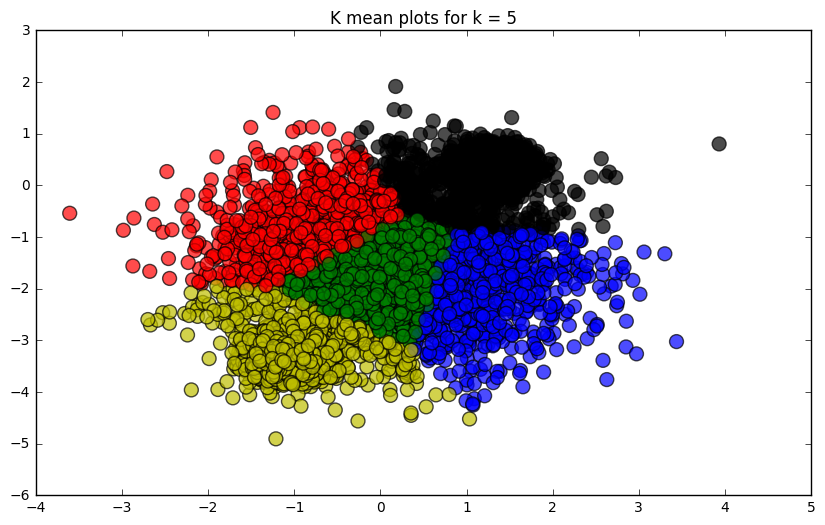

In [91]:
K_list = [1, 2, 3, 4, 5]
learning_rate = 0.01
color_list = ["g", "b", "r", "y", "k"]
for K in K_list:
    points, centroids, centroids_assign, loss, percentage, train = buildGraph_K_means_Adam(K, learning_rate)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)
    loss_recorder = np.array([])

    numIteration = 600
    P = []
    assign = []
    for itr in range(numIteration):
        loss_, P, assign, _ = sess.run([loss, percentage, centroids_assign, train], feed_dict={points: points_2d})
        loss_recorder = np.append(loss_recorder, loss_)
        if itr % 100 == 0:
            print("Number of cluster: %d, loss: %0.2f"%(K, loss_))
    print("Percentage for different clusters:")
    for k in range(K):
        print("Total K is %d, cluster %d: %0.2f"%(K, k, P[k][0])) 
    x = points_2d[:,0]
    y = points_2d[:,1]
    colors = [color_list[assign[i]] for i in range(Number_of_data)]
    plt.scatter(x,y,c=colors,alpha=0.7,s=100)
    #plt.axis([0,500, 0, 2])
    plt.title("K mean plots for k = %d"%(K))
    plt.show()

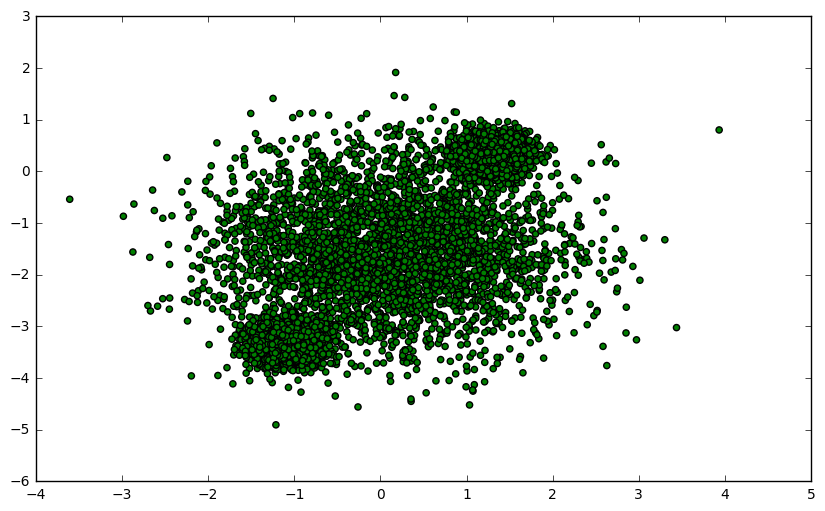

In [92]:
x = points_2d[:,0]
y = points_2d[:,1]
colors = ["g" for i in points_2d[:,0]]
plt.scatter(x,y,c=colors)

<h3>1.1.4</h3>

In [93]:
validSize = int(Number_of_data * 1.0 / 3.0)
validData = points_2d[:validSize,:]
trainData = points_2d[validSize:,:]
print(validData)

[[ 1.69424762 -2.4385797 ]
 [ 1.12750805 -2.06013747]
 [ 2.40075462 -2.96636567]
 ..., 
 [ 1.34861077  0.21586008]
 [-0.33089382 -2.13849022]
 [ 1.47810309  0.71745904]]


Number of cluster: 1, Iteration#: 0, Validation loss: 20439.83
Number of cluster: 1, Iteration#: 100, Validation loss: 13635.63
Number of cluster: 1, Iteration#: 200, Validation loss: 12772.85
Number of cluster: 1, Iteration#: 300, Validation loss: 12753.07
Number of cluster: 1, Iteration#: 400, Validation loss: 12753.19
Number of cluster: 1, Iteration#: 500, Validation loss: 12753.19
Number of cluster: 2, Iteration#: 0, Validation loss: 13525.31
Number of cluster: 2, Iteration#: 100, Validation loss: 5680.62
Number of cluster: 2, Iteration#: 200, Validation loss: 3639.08
Number of cluster: 2, Iteration#: 300, Validation loss: 3098.93
Number of cluster: 2, Iteration#: 400, Validation loss: 3025.75
Number of cluster: 2, Iteration#: 500, Validation loss: 3023.21
Number of cluster: 3, Iteration#: 0, Validation loss: 23361.99
Number of cluster: 3, Iteration#: 100, Validation loss: 10853.16
Number of cluster: 3, Iteration#: 200, Validation loss: 5392.41
Number of cluster: 3, Iteration#: 300

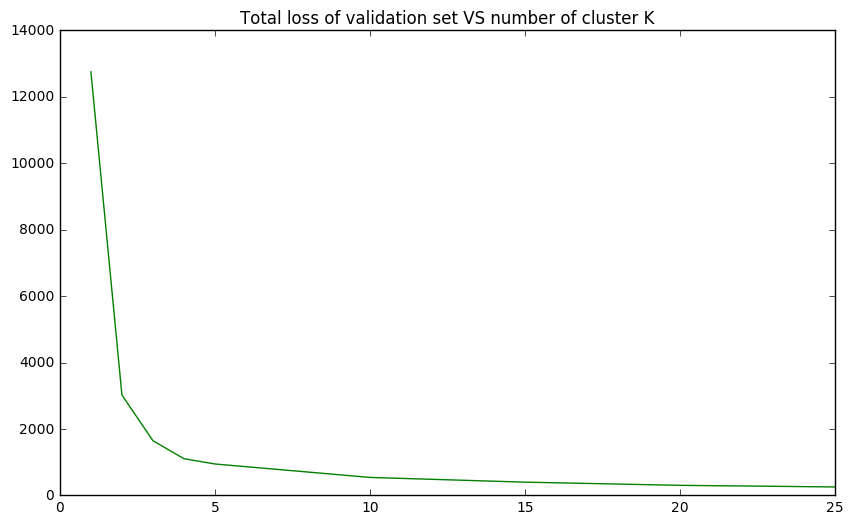

In [99]:
K_list = [1, 2, 3, 4, 5, 10, 15, 20, 25]
learning_rate = 0.01
color_list = ["g", "b", "r", "y", "k"]
loss_recorder = np.array([])

for K in K_list:
    tf.reset_default_graph()
    points, centroids, centroids_assign, loss, percentage, train = buildGraph_K_means_Adam(K, learning_rate)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)    
    numIteration = 600
    for itr in range(numIteration):
        _ = sess.run([train], feed_dict={points: trainData})
        loss_ = sess.run(loss, feed_dict={points: validData})
        if itr % 100 == 0:
            print("Number of cluster: %d, Iteration#: %d, Validation loss: %0.2f"%(K, itr, loss_))
    loss_ = sess.run(loss, feed_dict={points: validData})
    loss_recorder = np.append(loss_recorder, loss_)
plt.plot(K_list, loss_recorder, 'g')
plt.title("Total loss of validation set VS number of cluster K")
plt.show()

<h3>2.1.2</h3>

In [100]:
def get_log_gaussian(X, mu, diag_stdev):
    '''
    X: BxD
    mu: KxD
    diag_stdev: KxD
    B: number of data points
    D: dimension of a data point
    K: number of clusters
    return BxK matrix
    '''
    B = tf.shape(X)[0]
    D = tf.shape(X)[1]
    K = tf.shape(mu)[0]
    rep_X = tf.reshape(tf.tile(X, [1, K]), [B, K, D])
    dist = tf.contrib.distributions.MultivariateNormalDiag(mu, diag_stdev)
    return dist.log_pdf(rep_X)
    

In [92]:
mu = tf.constant([[1.0,3.0],[5.0,2.0],[1.0,3.0]], dtype=tf.float64)
diag_stdev = tf.constant([[1.0,1.0], [1.0,1.0],[1.0,1.0]], dtype=tf.float64)
X = tf.placeholder(tf.float64, [None, 2])
dist = get_log_gaussian(X, mu, diag_stdev)

sess = tf.InteractiveSession()
sess.run(dist, feed_dict={X: points_2d})

array([[-16.86794151, -17.15237132, -16.86794151],
       [-14.64850181, -17.57833214, -14.64850181],
       [-20.61769351, -17.54830934, -20.61769351],
       ..., 
       [-24.63118986, -35.19536871, -24.63118986],
       [ -6.10012272,  -9.38913378,  -6.10012272],
       [ -5.65596292,  -9.94046048,  -5.65596292]])

<h3>2.1.3</h3>

In [108]:
def get_log_P_Z_given_X(X, pi, mu, diag_stdev):
    '''
    X: BxD
    pi: 1xK
    mu: KxD
    diag_stdev: KxD
    B: number of data points
    D: dimension of a data point
    K: number of clusters
    return BxK matrix
    '''
    B = tf.shape(X)[0]
    D = tf.shape(X)[1]
    K = tf.shape(mu)[0]
    rep_pi = tf.reshape(tf.tile(pi, [1,B]), [B, K])
    log_gaussian = get_log_gaussian(X, mu, diag_stdev)
    res = logsoftmax(rep_pi + log_gaussian)
    return res
    

In [110]:
mu = tf.constant([[1.0,3.0],[5.0,2.0]], dtype=tf.float64)
diag_stdev = tf.constant([[1.0], [1.0]], dtype=tf.float64)
pi = logsoftmax(tf.constant([[0.5,0.5]], dtype=tf.float64))
X = tf.placeholder(tf.float64, [None, 2])
res = get_log_P_Z_given_X(X, pi, mu, diag_stdev)

sess = tf.InteractiveSession()
sess.run(res, feed_dict={X: points_2d})

array([[ -5.61010909e-01,  -8.45440722e-01],
       [ -5.20288178e-02,  -2.98185915e+00],
       [ -3.11478742e+00,  -4.54032457e-02],
       ..., 
       [ -2.58243746e-05,  -1.05642047e+01],
       [ -3.66122269e-02,  -3.32562329e+00],
       [ -1.36864553e-02,  -4.29818402e+00]])

<h3>2.2.2</h3>

In [101]:
def get_log_P(X, pi, mu, diag_stdev):
    '''
    X: BxD
    pi: 1xK
    mu: KxD
    diag_stdev: Kx1
    B: number of data points
    D: dimension of a data point
    K: number of clusters
    return float64
    '''
    B = tf.shape(X)[0]
    D = tf.shape(X)[1]
    K = tf.shape(mu)[0]
    rep_pi = tf.reshape(tf.tile(pi, [1,B]), [B, K])
    log_gaussian = get_log_gaussian(X, mu, diag_stdev)
    res = tf.reduce_sum(reduce_logsumexp(rep_pi + log_gaussian))
    return res

In [101]:
K = 2
mu = tf.Variable(tf.truncated_normal(shape=[K,2], stddev=0.5), name='mu_test')
diag_stdev = tf.Variable(tf.exp(tf.truncated_normal(shape=[K,1], stddev=0.5)), name='diag_stdev_test')
phi = tf.Variable(tf.div(tf.ones(shape=[1,K]), K), name='phi_test')
pi = logsoftmax(phi)
X = tf.placeholder(tf.float32, [None, 2])
res = get_log_P(X, pi, mu, diag_stdev)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
#sess.run(tf.shape(mu)[0])
sess.run(res, feed_dict={X: points_2d})

-47012.844

In [102]:
def buildGraph_MoG_Adam_2d(K, learning_rate):
    # Variable creation
    points = tf.placeholder(tf.float32, [None, 2], name='input_points')
    mu = tf.Variable(tf.truncated_normal(shape=[K,2], stddev=0.5), name='mu')
    diag_stdev = tf.Variable(tf.exp(tf.truncated_normal(shape=[K,2], stddev=0.5)), name='diag_stdev')
    phi = tf.Variable(tf.truncated_normal(shape=[1,K], stddev=0.5), name='phi')
    pi = logsoftmax(phi)
    
    # Loss definition
    loss = -get_log_P(points, pi, mu, diag_stdev)
    # Training mechanism
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)
    train = optimizer.minimize(loss=loss)
    return points, pi, mu, diag_stdev, loss, train

Iteration#: 0, loss: 42818.17
Mean matrix is:
[[-0.26005882 -0.48440856]
 [-0.31688103  0.1281257 ]
 [ 0.21622854  0.72260815]
 [ 0.48240408 -0.68399584]
 [-0.29560786  0.39827558]]
diag_stdev is:
[[ 1.88856578  1.15391183]
 [ 0.55845696  1.41535676]
 [ 1.42217183  0.60990757]
 [ 1.46124065  1.1403805 ]
 [ 0.60895008  0.69249767]]
pi is:
[[-1.11352241 -1.99869096 -1.39032114 -1.62152922 -2.41356564]]
Iteration#: 100, loss: 25682.00
Mean matrix is:
[[-0.10026953 -1.23761511]
 [-1.07399297 -0.57616246]
 [ 1.33271039  0.31176049]
 [-0.55814838 -1.60208654]
 [ 0.499396    0.00937429]]
diag_stdev is:
[[ 1.1187377   1.61728024]
 [ 0.16069232  1.95555925]
 [ 0.15553874  0.18782651]
 [ 0.77191049  1.5546205 ]
 [ 0.9961794   0.28330937]]
pi is:
[[-1.5585562  -2.75741577 -1.15197253 -0.99205571 -3.23708296]]
Iteration#: 200, loss: 21014.63
Mean matrix is:
[[ 0.27476794 -1.49352765]
 [-1.16113639 -1.00539553]
 [ 1.29971683  0.30957308]
 [-1.09654391 -2.62731338]
 [ 0.611974   -0.8674773 ]]
diag_s

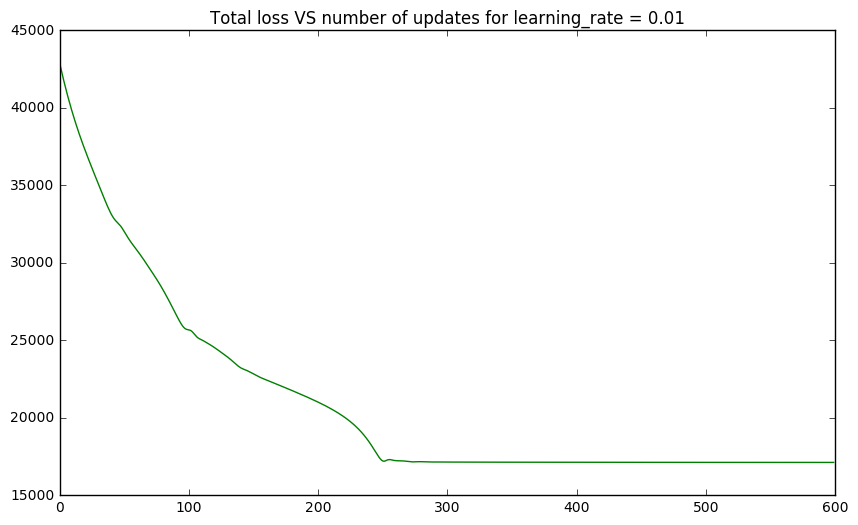

In [105]:
learning_rate = 0.01
points, pi, mu, diag_stdev, loss, train = buildGraph_MoG_Adam_2d(5, learning_rate)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
loss_recorder = np.array([])

numIteration = 600
best_pi = []
for itr in range(numIteration):
    loss_, best_pi, mu_, diag_stdev_, _ = sess.run([loss, pi, mu, diag_stdev, train], feed_dict={points: points_2d})
    loss_recorder = np.append(loss_recorder, loss_)
    if itr % 100 == 0:
        print("Iteration#: %d, loss: %0.2f"%(itr, loss_))
        print("Mean matrix is:")
        print(mu_)
        print("diag_stdev is:")
        print(diag_stdev_)
        print("pi is:")
        print(best_pi)
best_pi = sess.run(tf.exp(best_pi))
print("The best pi values are:")
print(best_pi)
plt.plot(np.arange(numIteration), loss_recorder, 'g')
#plt.axis([0,500, 0, 2])
plt.title("Total loss VS number of updates for learning_rate = %0.2f"%(learning_rate))
plt.show()

<h3>2.2.3</h3>

In [106]:
def get_MoG_assign(X, pi, mi, diag_stdev):
    assign = tf.argmax(get_log_P_Z_given_X(X, pi, mu, diag_stdev), 1)
    return assign

In [112]:
trainData.shape

(6667, 2)

In [ ]:
def plot_ellipse(mean, cov_sqrt, alpha, num_points=100):
    angles = np.linspace(0, 2*np.pi, num_points)
    circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
    cur_pts = mean + np.dot(circle_pts, cov_sqrt)
    plt.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha

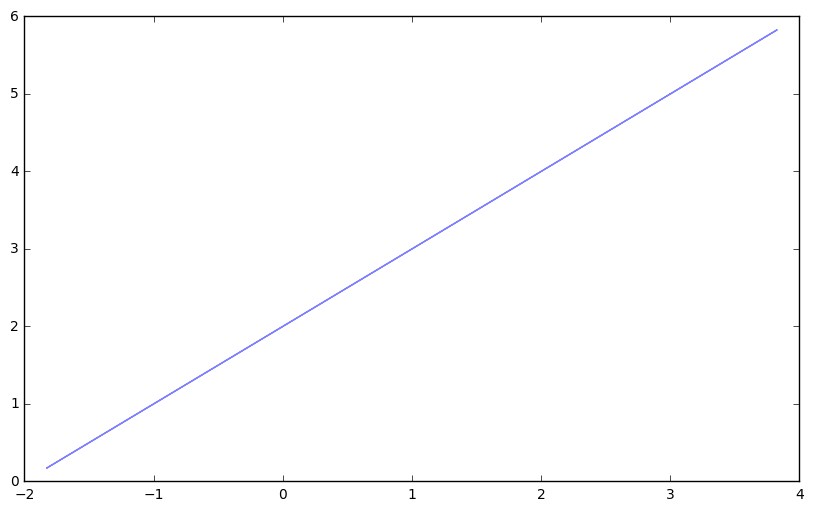

In [138]:
mu = tf.constant([[1.0,3.0],[5.0,2.0]], dtype=tf.float64)
diag_stdev = tf.constant([[1.0,1.0], [1.0,1.0]], dtype=tf.float64)
rep_diag_stdev = tf.reshape(tf.tile(diag_stdev, [1,2]), [2,2,2])
mu_, rep_diag_stdev = sess.run([mu, rep_diag_stdev])
plot_ellipse(mu_[0], rep_diag_stdev[0], 0.5)
plt.show()

Number of cluster: 1, Iteration#: 0, Validation loss: 26967.77
Number of cluster: 1, Iteration#: 100, Validation loss: 12457.49
Number of cluster: 1, Iteration#: 200, Validation loss: 11611.09
Number of cluster: 1, Iteration#: 300, Validation loss: 11452.70
Number of cluster: 1, Iteration#: 400, Validation loss: 11444.53
Number of cluster: 1, Iteration#: 500, Validation loss: 11444.38
Number of cluster: 1, Iteration#: 600, Validation loss: 11444.41
Number of cluster: 1, Iteration#: 700, Validation loss: 11444.41
Number of cluster: 1, Iteration#: 800, Validation loss: 11444.41
Number of cluster: 1, Iteration#: 900, Validation loss: 11444.41
diag_stdev:  [[ 1.1489222   1.59212494]]
pi:  [[ 1.]]


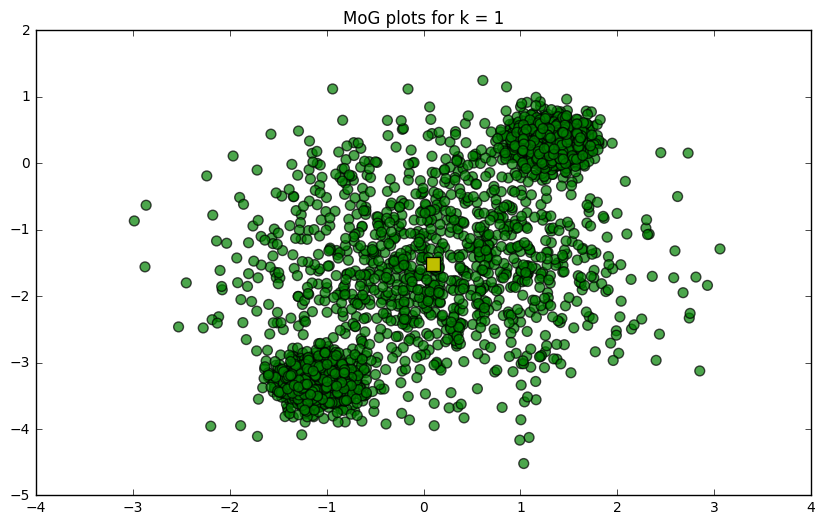

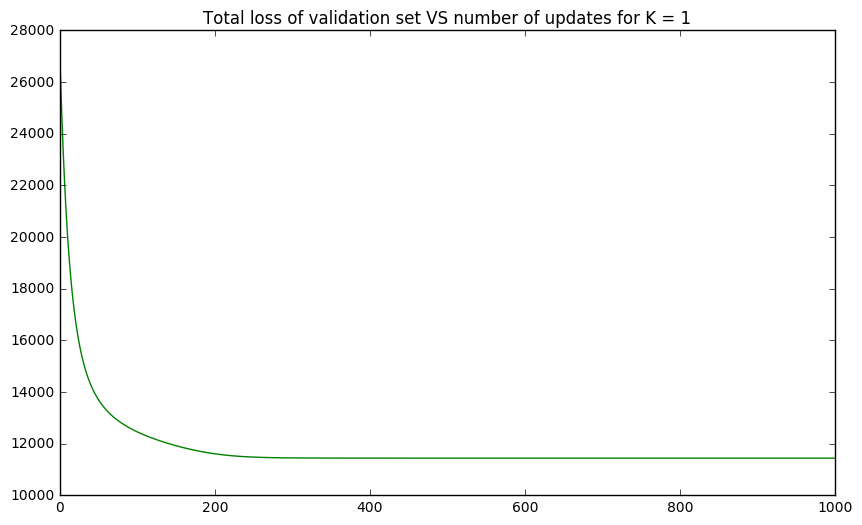

Number of cluster: 2, Iteration#: 0, Validation loss: 19025.80
Number of cluster: 2, Iteration#: 100, Validation loss: 10248.71
Number of cluster: 2, Iteration#: 200, Validation loss: 9096.51
Number of cluster: 2, Iteration#: 300, Validation loss: 8625.26
Number of cluster: 2, Iteration#: 400, Validation loss: 8176.96
Number of cluster: 2, Iteration#: 500, Validation loss: 8021.71
Number of cluster: 2, Iteration#: 600, Validation loss: 8021.77
Number of cluster: 2, Iteration#: 700, Validation loss: 8021.77
Number of cluster: 2, Iteration#: 800, Validation loss: 8022.16
Number of cluster: 2, Iteration#: 900, Validation loss: 8021.74
diag_stdev:  [[ 0.20333946  0.20124629]
 [ 0.92417753  1.11959076]]
pi:  [[ 0.34131256  0.65868747]]


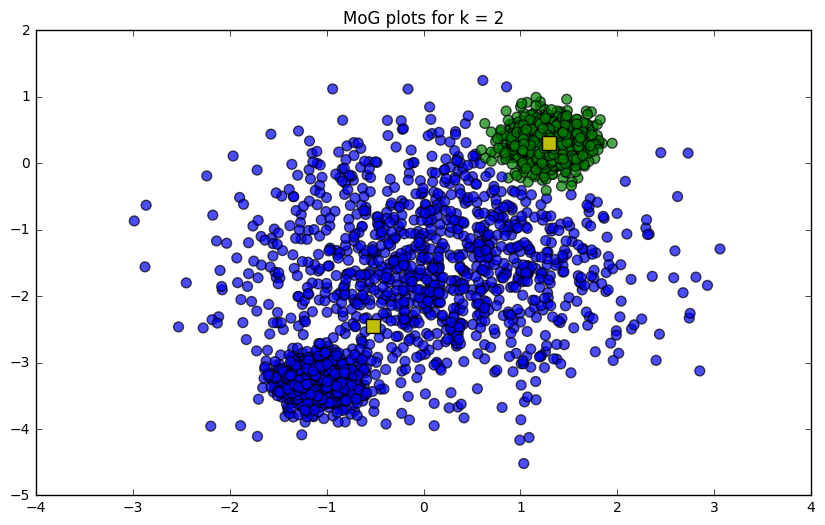

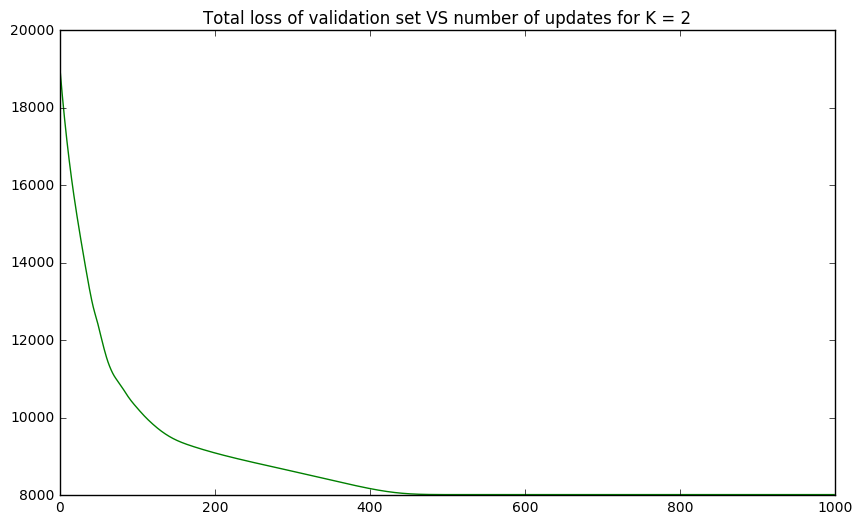

Number of cluster: 3, Iteration#: 0, Validation loss: 15506.42
Number of cluster: 3, Iteration#: 100, Validation loss: 9340.75
Number of cluster: 3, Iteration#: 200, Validation loss: 7982.63
Number of cluster: 3, Iteration#: 300, Validation loss: 6913.73
Number of cluster: 3, Iteration#: 400, Validation loss: 5682.53
Number of cluster: 3, Iteration#: 500, Validation loss: 5683.41
Number of cluster: 3, Iteration#: 600, Validation loss: 5683.57
Number of cluster: 3, Iteration#: 700, Validation loss: 5683.48
Number of cluster: 3, Iteration#: 800, Validation loss: 5683.54
Number of cluster: 3, Iteration#: 900, Validation loss: 5683.67
diag_stdev:  [[ 0.19952257  0.19864142]
 [ 0.19745642  0.19447362]
 [ 1.0016675   1.00533521]]
pi:  [[ 0.33227023  0.33357325  0.33415645]]


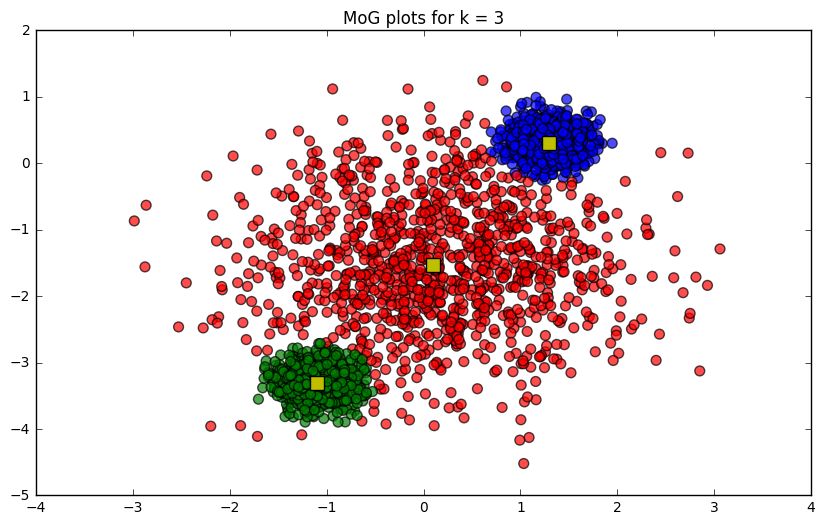

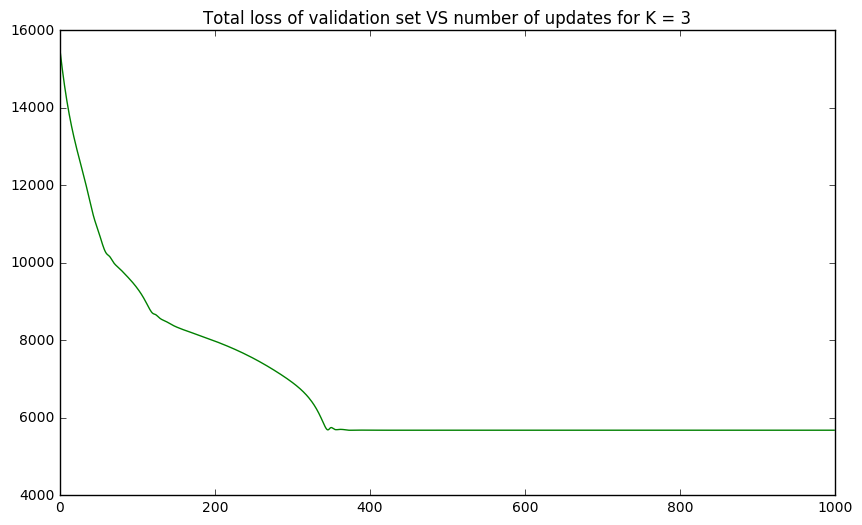

Number of cluster: 4, Iteration#: 0, Validation loss: 12451.10
Number of cluster: 4, Iteration#: 100, Validation loss: 7820.79
Number of cluster: 4, Iteration#: 200, Validation loss: 6981.88
Number of cluster: 4, Iteration#: 300, Validation loss: 5682.75
Number of cluster: 4, Iteration#: 400, Validation loss: 5683.57
Number of cluster: 4, Iteration#: 500, Validation loss: 5683.64
Number of cluster: 4, Iteration#: 600, Validation loss: 5683.59
Number of cluster: 4, Iteration#: 700, Validation loss: 5683.53
Number of cluster: 4, Iteration#: 800, Validation loss: 5683.44
Number of cluster: 4, Iteration#: 900, Validation loss: 5683.51
diag_stdev:  [[ 0.197586    0.19444324]
 [ 1.00234485  0.91832525]
 [ 0.19982454  0.19880046]
 [ 0.99470741  0.89034367]]
pi:  [[ 0.33380359  0.24544245  0.33251125  0.08824277]]


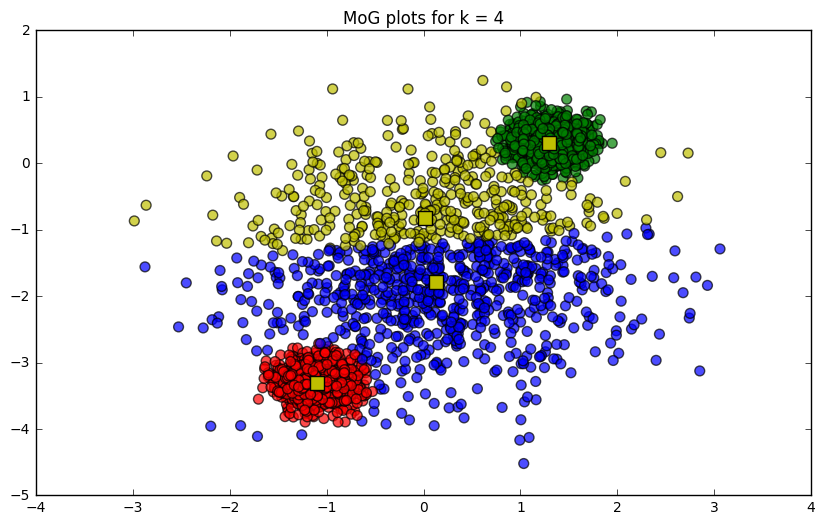

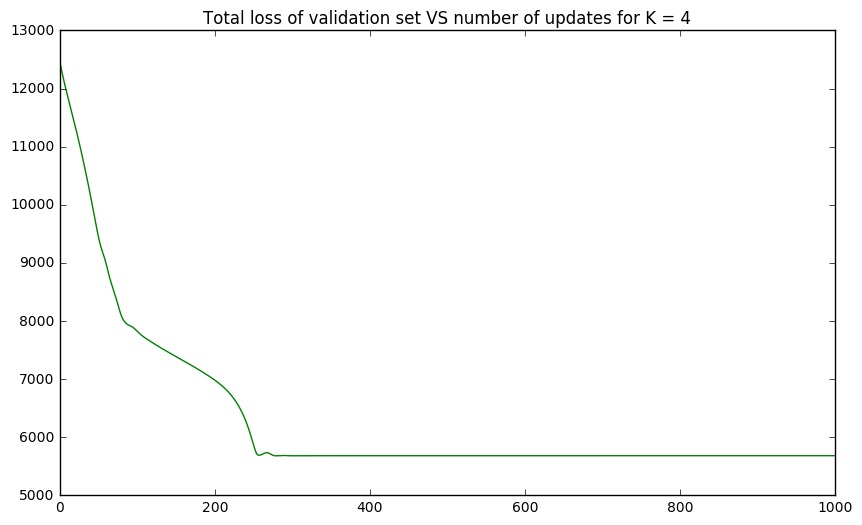

Number of cluster: 5, Iteration#: 0, Validation loss: 13393.67
Number of cluster: 5, Iteration#: 100, Validation loss: 8056.89
Number of cluster: 5, Iteration#: 200, Validation loss: 7460.83
Number of cluster: 5, Iteration#: 300, Validation loss: 6032.86
Number of cluster: 5, Iteration#: 400, Validation loss: 5683.49
Number of cluster: 5, Iteration#: 500, Validation loss: 5683.74
Number of cluster: 5, Iteration#: 600, Validation loss: 5683.78
Number of cluster: 5, Iteration#: 700, Validation loss: 5683.92
Number of cluster: 5, Iteration#: 800, Validation loss: 5684.07
Number of cluster: 5, Iteration#: 900, Validation loss: 5684.27
diag_stdev:  [[ 0.98492169  0.90899843]
 [ 0.91341281  1.00508428]
 [ 0.99122673  0.90466446]
 [ 0.19968449  0.19881956]
 [ 0.19754215  0.19550836]]
pi:  [[ 0.17788407  0.09200326  0.0637035   0.3325325   0.3338767 ]]


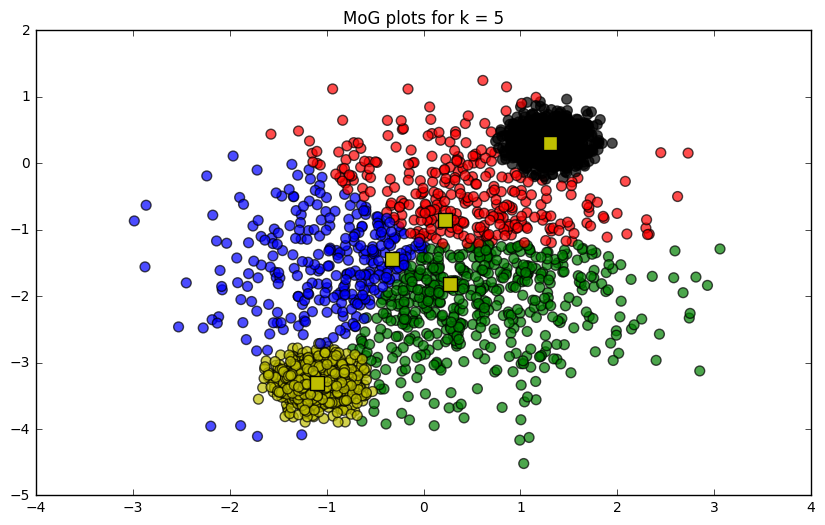

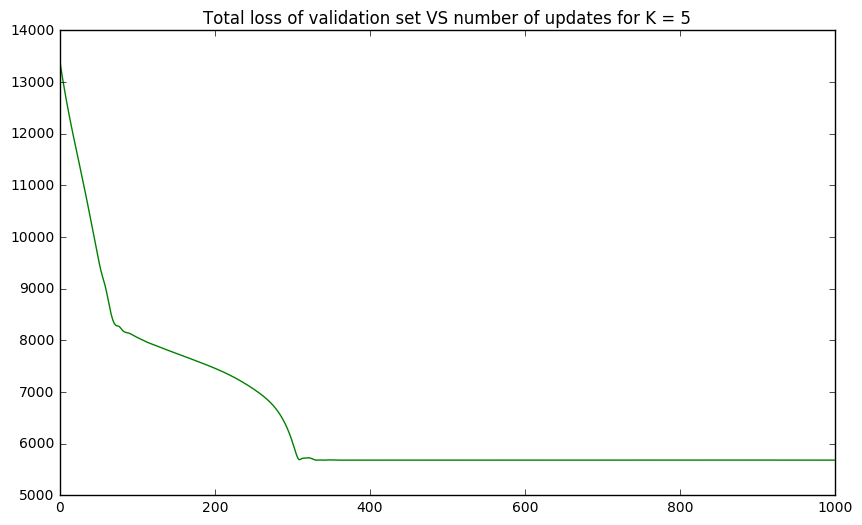

In [113]:
K_list = [1, 2, 3, 4, 5]
learning_rate = 0.01
color_list = ["g", "b", "r", "y", "k"]
number_of_valid_data = validData.shape[0]
for K in K_list:
    tf.reset_default_graph()
    points, pi, mu, diag_stdev, loss, train = buildGraph_MoG_Adam_2d(K, learning_rate)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)
    loss_recorder = np.array([])
    
    numIteration = 1000
    pi_, mu_, diag_stdev_ = [], [], []
    for itr in range(numIteration):
        pi_,mu_,diag_stdev_,_ = sess.run([pi, mu, diag_stdev, train], feed_dict={points: trainData})
        loss_ = sess.run(loss, feed_dict={points: validData})
        loss_recorder = np.append(loss_recorder, loss_)
        if itr % 100 == 0:
            print("Number of cluster: %d, Iteration#: %d, Validation loss: %0.2f"%(K, itr, loss_))
    print("diag_stdev: ", diag_stdev_)
    pi_ = sess.run(tf.exp(pi_))
    print("pi: ", pi_)
    rep_diag_stdev = tf.reshape(tf.tile(diag_stdev, [1,2]), [K,2,2])
    rep_diag_stdev = sess.run(rep_diag_stdev)
    x = validData[:,0]
    y = validData[:,1]
    #print(pi_, mu_, diag_stdev_)
    assign = get_MoG_assign(points, pi_, mu_, diag_stdev_)
    assign = sess.run(assign, feed_dict={points: validData})
    #print(assign)
    colors = [color_list[assign[i]] for i in range(number_of_valid_data)]
    plt.scatter(x,y,c=colors,alpha=0.7,s=50)
    plt.scatter(mu_[:,0],mu_[:,1],marker='s', c="y",s=100)

    #plt.axis([0,500, 0, 2])
    plt.title("MoG plots for k = %d"%(K))
    plt.show()
    
    plt.plot(np.arange(numIteration), loss_recorder, 'g')
    #plt.axis([0,500, 0, 2])
    plt.title("Total loss of validation set VS number of updates for K = %d"%(K))
    plt.show()

<h3>2.2.4</h3>

In [114]:
points_100d = np.load("../data/data100D.npy")

In [117]:
Number_of_data = points_100d.shape[0]
validSize = int(Number_of_data * 1.0 / 3.0)
validData = points_100d[:validSize,:]
trainData = points_100d[validSize:,:]
print(validData)

[[-0.10302101 -1.25855529 -1.07682836 ..., -0.3344036  -0.8396759
   1.01970744]
 [ 0.76420188 -1.03587663 -1.43337035 ...,  0.27306277 -1.27968597
   1.79634035]
 [-1.89033902 -0.19838578 -0.18936551 ..., -1.10642648  0.80143613
   0.35418662]
 ..., 
 [ 0.74477154  0.4648951   0.70218754 ...,  0.52829725  0.10996841
  -1.22521162]
 [-0.29066968  0.79323816  0.55533499 ...,  0.49830598 -0.84493768
  -0.46103576]
 [-1.78428316 -0.53080934  0.04283287 ..., -1.24885917  1.59761763
   0.71597099]]


In [115]:
def buildGraph_K_means_Adam_100d(K, learning_rate):
    # Variable creation
    points = tf.placeholder(tf.float32, [None, 100], name='input_points')
    centroids = tf.Variable(tf.truncated_normal(shape=[K,100], stddev=0.5), name='centroids')
    N = tf.shape(points)[0]
    # Replicate to N copies of each centroid and K copies of each
    # point, then subtract and compute the sum of squared distances.
    rep_centroids = tf.reshape(tf.tile(centroids, [N, 1]), [N, K, 100])
    rep_points = tf.reshape(tf.tile(points, [1, K]), [N, K, 100])
    sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids), reduction_indices=2)
    best_centroids = tf.argmin(sum_squares, 1)
    count = tf.to_float(tf.unsorted_segment_sum(tf.ones_like(points), best_centroids, K))
    percentage = tf.div(count, tf.to_float(N))
    # Loss definition
    indices_pair = tf.concat(1, [tf.reshape(tf.range(0, N), [-1,1]), tf.to_int32(tf.reshape(best_centroids, [-1,1]))])
    loss = tf.reduce_sum(tf.gather_nd(sum_squares, indices_pair))
    # Training mechanism
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)
    train = optimizer.minimize(loss=loss)
    return points, centroids, best_centroids, loss, percentage, train

Number of cluster: 5, Iteration#: 0, Validation loss: 354313.59
Number of cluster: 5, Iteration#: 100, Validation loss: 111742.73
Number of cluster: 5, Iteration#: 200, Validation loss: 76686.20
Number of cluster: 5, Iteration#: 300, Validation loss: 73162.27
Number of cluster: 5, Iteration#: 400, Validation loss: 72968.59
Number of cluster: 10, Iteration#: 0, Validation loss: 344702.31
Number of cluster: 10, Iteration#: 100, Validation loss: 100961.64
Number of cluster: 10, Iteration#: 200, Validation loss: 75557.25
Number of cluster: 10, Iteration#: 300, Validation loss: 73151.45
Number of cluster: 10, Iteration#: 400, Validation loss: 72970.05
Number of cluster: 15, Iteration#: 0, Validation loss: 342403.38
Number of cluster: 15, Iteration#: 100, Validation loss: 101346.47
Number of cluster: 15, Iteration#: 200, Validation loss: 75238.67
Number of cluster: 15, Iteration#: 300, Validation loss: 72627.66
Number of cluster: 15, Iteration#: 400, Validation loss: 72324.04
Number of clust

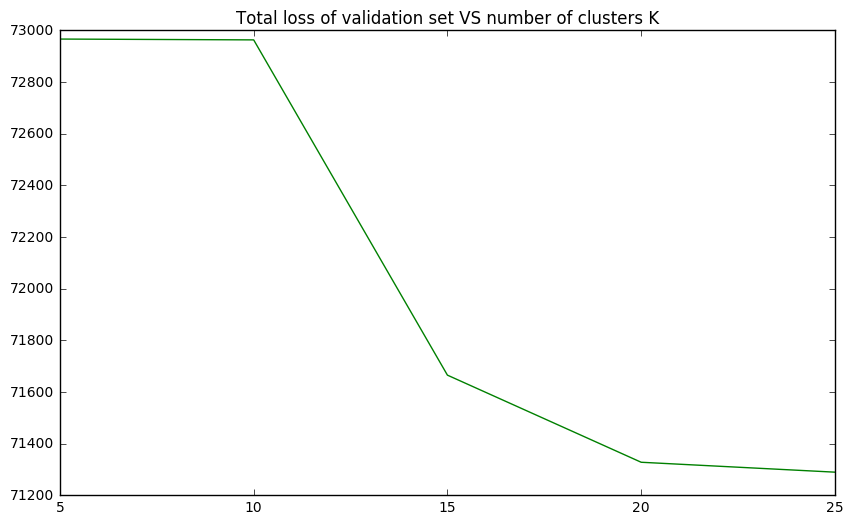

In [118]:
K_list = [5,10,15,20,25]
learning_rate = 0.01
color_list = ["g", "b", "r", "y", "k"]
loss_recorder = np.array([])
for K in K_list:
    tf.reset_default_graph()
    points, centroids, centroids_assign, loss, percentage, train = buildGraph_K_means_Adam_100d(K, learning_rate)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)
    
    numIteration = 500
    for itr in range(numIteration):
        _ = sess.run([train], feed_dict={points: trainData})
        loss_ = sess.run(loss, feed_dict={points: validData})
        if itr % 100 == 0:
            print("Number of cluster: %d, Iteration#: %d, Validation loss: %0.2f"%(K, itr, loss_))
    loss_ = sess.run(loss, feed_dict={points: validData})
    loss_recorder = np.append(loss_recorder, loss_)
plt.plot(K_list, loss_recorder, 'g')
    #plt.axis([0,500, 0, 2])
plt.title("Total loss of validation set VS number of clusters K")
plt.show()

In [119]:
def buildGraph_MoG_Adam_100d(K, learning_rate):
    # Variable creation
    points = tf.placeholder(tf.float32, [None, 100], name='input_points')
    mu = tf.Variable(tf.truncated_normal(shape=[K,100], stddev=0.5), name='mu')
    diag_stdev = tf.Variable(tf.exp(tf.truncated_normal(shape=[K,100], stddev=0.5)), name='diag_stdev')
    phi = tf.Variable(tf.truncated_normal(shape=[1,K], stddev=0.5), name='phi')
    pi = logsoftmax(phi)
    
    # Loss definition
    loss = -get_log_P(points, pi, mu, diag_stdev)
    # Training mechanism
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)
    train = optimizer.minimize(loss=loss)
    return points, pi, mu, diag_stdev, loss, train

In [120]:
K_list = [5,10,15,20,25]
learning_rate = 0.01
color_list = ["g", "b", "r", "y", "k"]
number_of_valid_data = validData.shape[0]
loss_recorder = np.array([])

for K in K_list:
    tf.reset_default_graph()
    points, pi, mu, diag_stdev, loss, train = buildGraph_MoG_Adam_100d(K, learning_rate)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)
    
    numIteration = 600
    pi_, mu_, diag_stdev_ = [], [], []
    for itr in range(numIteration):
        pi_,mu_,diag_stdev_,_ = sess.run([pi, mu, diag_stdev, train], feed_dict={points: trainData})
        loss_ = sess.run(loss, feed_dict={points: validData})
        if itr % 100 == 0:
            print("Number of cluster: %d, Iteration#: %d, Validation loss: %0.2f"%(K, itr, loss_))
    loss_ = sess.run(loss, feed_dict={points: validData})
    loss_recorder = np.append(loss_recorder, loss_)

    
plt.plot(K_list, loss_recorder, 'g')
    #plt.axis([0,500, 0, 2])
plt.title("Total loss of validation set VS number of clusters K")
plt.show()

Number of cluster: 5, Iteration#: 0, Validation loss: 551236.06
Number of cluster: 5, Iteration#: 100, Validation loss: 223675.59
Number of cluster: 5, Iteration#: 200, Validation loss: 143823.45
Number of cluster: 5, Iteration#: 300, Validation loss: 132127.41
Number of cluster: 5, Iteration#: 400, Validation loss: 128591.30
Number of cluster: 5, Iteration#: 500, Validation loss: 128321.61
Number of cluster: 10, Iteration#: 0, Validation loss: 537486.69
Number of cluster: 10, Iteration#: 100, Validation loss: 214886.78
Number of cluster: 10, Iteration#: 200, Validation loss: 144034.16
Number of cluster: 10, Iteration#: 300, Validation loss: 130731.87
Number of cluster: 10, Iteration#: 400, Validation loss: 128957.61
Number of cluster: 10, Iteration#: 500, Validation loss: nan
Number of cluster: 15, Iteration#: 0, Validation loss: 538894.06


KeyboardInterrupt: 

<h3>3.2</h3>

In [69]:
data = np.load ("../data/tinymnist.npz")
trainData, trainTarget = data ["x"], data["y"]
validData, validTarget = data ["x_valid"], data ["y_valid"]
testData, testTarget = data ["x_test"], data ["y_test"]
print(trainData.shape)

(700, 64)


In [210]:
w = tf.constant([[[1,2],[1,2],[1,2]],[[1,2],[1,2],[1,2]]],dtype=tf.float32)
w_t = tf.matrix_transpose(w)
mu = tf.Variable(tf.truncated_normal(shape=[2,3], stddev=0.5), name='mu_test1')
phi = tf.matrix_diag(tf.constant([[1,2,3],[1,2,3]],dtype=tf.float32))
cov_sqrt = tf.cholesky(tf.add(phi, tf.matmul(w, w_t)))
dist = tf.contrib.distributions.MultivariateNormalCholesky(mu, cov_sqrt)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
sess.run(dist.pdf(dist.sample(3)))

array([[ 0.00209655,  0.00043591],
       [ 0.0018715 ,  0.00096866],
       [ 0.00087755,  0.00062126]], dtype=float32)

In [66]:
def get_log_P_FA(X, mu, diag_stdev, W):
    '''
    X: BxD
    mu: KxD
    diag_stdev: KxD
    W: KxDxK
    B: number of data points
    D: dimension of a data point
    K: number of clusters
    return log_p
    '''
    
    B = tf.shape(X)[0]
    D = tf.shape(X)[1]
    K = tf.shape(mu)[0]
    phi = tf.matrix_diag(diag_stdev)
    W_T = tf.matrix_transpose(W)
    cov_sqrt = tf.add(phi, tf.matmul(W, W_T))
    cholesky_cov = tf.cholesky(cov_sqrt)
    rep_X = tf.reshape(tf.tile(X, [1, K]), [B, K, D])
    dist = tf.contrib.distributions.MultivariateNormalCholesky(mu, cholesky_cov)
    log_pdf = dist.log_pdf(rep_X)
    res = tf.reduce_sum(log_pdf)
    return res

In [52]:
K = 4
learning_rate = 0.01
loss_recorder = np.array([])
tf.reset_default_graph()
points = tf.placeholder(tf.float64, [None, 64], name='input_points_test')
mu = tf.Variable(tf.truncated_normal(shape=[K,64], stddev=0.5, dtype=tf.float64), name='mu_test')
diag_stdev = tf.Variable(tf.exp(tf.ones(shape=[K,64],dtype=tf.float64)*2), name='diag_stdev_test')
W = tf.Variable(tf.truncated_normal(shape=[K,64,K], stddev=0.5, dtype=tf.float64), name='weight_test')
loss = -get_log_P_FA(points, mu, diag_stdev, W)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)

train = optimizer.minimize(loss=loss)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
numIteration = 500
for itr in range(numIteration):
    diag_stdev_, loss_, _ = sess.run([diag_stdev, loss, train], feed_dict={points: trainData})
    loss_recorder = np.append(loss_recorder, loss_)
    if itr % 1 == 0:
        print("Iteration#: %d, loss: %0.2f"%(itr, loss_))

Iteration#: 0, loss: 353789.21
Iteration#: 100, loss: 331413.22
Iteration#: 200, loss: 314692.92
Iteration#: 300, loss: 293296.76
Iteration#: 400, loss: 263409.77


In [83]:
def buildGraph_FA_Adam(K, learning_rate):
    # Variable creation
    points = tf.placeholder(tf.float32, [None, 64], name='input_points')
    mu = tf.Variable(tf.truncated_normal(shape=[K,64], stddev=0.5), name='mu')
    diag_stdev = tf.Variable(tf.exp(tf.truncated_normal(shape=[K,64], stddev=0.5)), name='diag_stdev')
    W = tf.Variable(tf.exp(tf.truncated_normal(shape=[K,64,K], stddev=0.5)), name='weight')
    
    # Loss definition
    loss = -get_log_P_FA(points, mu, diag_stdev, W)
    # Training mechanism
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1=0.9, beta2=0.99, epsilon=1e-5)
    train = optimizer.minimize(loss=loss)
    return points, mu, diag_stdev, W, loss, train

Iteration#: 0, loss: 210907.50
Iteration#: 100, loss: 193173.08
Iteration#: 200, loss: 174727.34
Iteration#: 300, loss: 157348.44
Iteration#: 400, loss: 138597.98
Iteration#: 500, loss: 118315.23
Iteration#: 600, loss: 96369.58
Iteration#: 700, loss: 75968.70
Iteration#: 800, loss: 59426.82
Iteration#: 900, loss: 46204.38
Iteration#: 1000, loss: 33384.45
Iteration#: 1100, loss: 21588.42
Iteration#: 1200, loss: 13941.97
Iteration#: 1300, loss: 6260.40
Iteration#: 1400, loss: -2520.31
Iteration#: 1500, loss: -9176.62
Iteration#: 1600, loss: -13468.15
Iteration#: 1700, loss: -17277.64
Iteration#: 1800, loss: -19826.55
Iteration#: 1900, loss: -22152.26
Iteration#: 2000, loss: -23342.30
Iteration#: 2100, loss: -24462.05
Iteration#: 2200, loss: -25752.57
Iteration#: 2300, loss: -26643.23
Iteration#: 2400, loss: -27248.90
Iteration#: 2500, loss: -27751.44
Iteration#: 2600, loss: -28274.61
Iteration#: 2700, loss: -28823.65
Iteration#: 2800, loss: -29404.92
Iteration#: 2900, loss: -30030.09
Ite

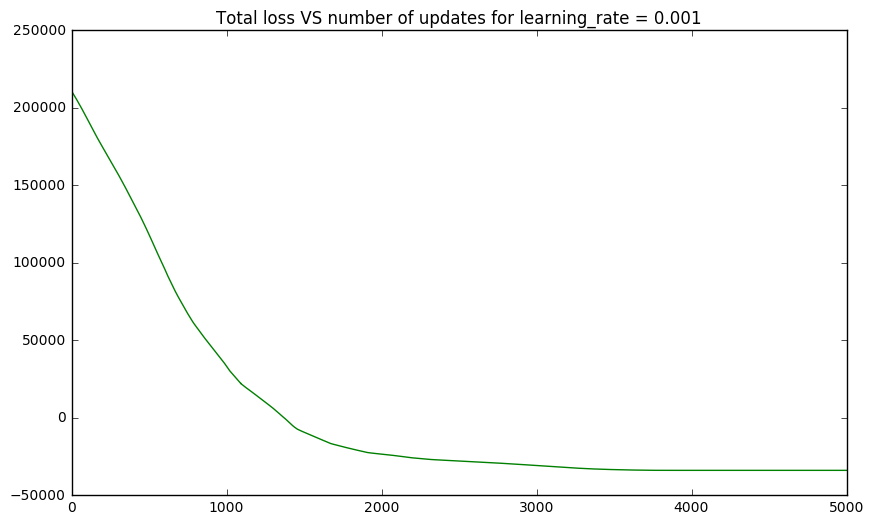

In [85]:
learning_rate = 0.001
tf.reset_default_graph()
points, mu, diag_stdev, W, loss, train = buildGraph_FA_Adam(4, learning_rate)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
loss_recorder = np.array([])

numIteration = 5000
for itr in range(numIteration):
    mu_, W_, loss_, _ = sess.run([mu, W, loss, train], feed_dict={points: trainData})
    loss_recorder = np.append(loss_recorder, loss_)
    if itr % 100 == 0:
        print("Iteration#: %d, loss: %0.2f"%(itr, loss_))
        #print("Mean matrix is:")
        #print(mu_)
        #print("Weight matrix is:")
        #print(W_)
plt.plot(np.arange(numIteration), loss_recorder, 'g')
#plt.axis([0,500, 0, 2])
plt.title("Total loss VS number of updates for learning_rate = %0.3f"%(learning_rate))
plt.show()